In [2]:
import numpy as np

In [3]:
with open("input/day14.txt") as f:
    df = np.array([np.array(list(x)) for x in f.read().split('\n')])

In [4]:
df

array([['.', '.', '.', ..., '#', '.', 'O'],
       ['O', '#', '.', ..., '.', '.', '#'],
       ['O', '.', '.', ..., '.', '.', '.'],
       ...,
       ['.', '#', '#', ..., '.', '#', '.'],
       ['.', '.', '#', ..., '.', '.', '#'],
       ['.', '.', '.', ..., '.', '.', '.']], dtype='<U1')

In [5]:
def find_points(data: np.array):
    points = []
    for i in range(0, len(data)):
        if data[i] == 'O':
            points.append(i)
    # print(points)
    return points

In [6]:
import functools

#@functools.lru_cache(maxsize=None)
def move_recursion(point, i):
    if df[i-1][point] == '.' and i > 0:
        df[i-1][point] = 'O'
        df[i][point] = '.'
        move_recursion(point, i-1)
    else:
        return

def move(points: list, i: int):
    for point in points:
        # print(f'points {points}')
        # print(f'point {point}')
        move_recursion(point, i)
        if i == 0:
            return

In [144]:
df.transpose()

array([['O', 'O', '.', 'O', '.', 'O', '.', '.', '#', '#'],
       ['.', '.', '.', 'O', 'O', '.', '.', '.', '.', 'O'],
       ['.', 'O', '.', '.', '.', '#', 'O', '.', '.', 'O'],
       ['.', 'O', '.', '#', '.', '.', '.', '.', '.', '.'],
       ['.', '#', '.', 'O', '.', '.', '.', '.', '.', '.'],
       ['#', '.', '#', '.', '.', 'O', '#', '.', '#', '#'],
       ['.', '.', '#', '.', '.', '.', 'O', '.', '#', '.'],
       ['.', '.', '.', '.', 'O', '#', '.', 'O', '#', '.'],
       ['.', '.', '.', '.', '#', '.', '.', '.', '.', '.'],
       ['.', '#', '.', 'O', '.', '#', 'O', '.', '.', '.']], dtype='<U1')

In [145]:
for i in range(1,len(df)):
    punkty = find_points(df[i])
    move(punkty, i)
    
df #przeniesione zera na gore


[0, 2, 3]
[]
[0, 1, 4, 9]
[1, 7]
[0, 5]
[2, 6, 9]
[7]
[]
[1, 2]


array([['O', 'O', 'O', 'O', '.', '#', '.', 'O', '.', '.'],
       ['O', 'O', '.', '.', '#', '.', '.', '.', '.', '#'],
       ['O', 'O', '.', '.', 'O', '#', '#', '.', '.', 'O'],
       ['O', '.', '.', '#', '.', 'O', 'O', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '#', '.'],
       ['.', '.', '#', '.', '.', '.', '.', '#', '.', '#'],
       ['.', '.', 'O', '.', '.', '#', '.', 'O', '.', 'O'],
       ['.', '.', 'O', '.', '.', '.', '.', '.', '.', '.'],
       ['#', '.', '.', '.', '.', '#', '#', '#', '.', '.'],
       ['#', '.', '.', '.', '.', '#', '.', '.', '.', '.']], dtype='<U1')

In [7]:
def score(data: np.array):
    score = 0
    for i in range(0,len(data)):
        punkty = find_points(data[i])
        score += len(punkty)*(len(data)-i)
        #print(score)
    return score

In [30]:
score(df)

104

In [32]:
df

array([['O', '.', '.', '.', '.', '#', '.', '.', '.', '.'],
       ['O', '.', 'O', 'O', '#', '.', '.', '.', '.', '#'],
       ['.', '.', '.', '.', '.', '#', '#', '.', '.', '.'],
       ['O', 'O', '.', '#', 'O', '.', '.', '.', '.', 'O'],
       ['.', 'O', '.', '.', '.', '.', '.', 'O', '#', '.'],
       ['O', '.', '#', '.', '.', 'O', '.', '#', '.', '#'],
       ['.', '.', 'O', '.', '.', '#', 'O', '.', '.', 'O'],
       ['.', '.', '.', '.', '.', '.', '.', 'O', '.', '.'],
       ['#', '.', '.', '.', '.', '#', '#', '#', '.', '.'],
       ['#', 'O', 'O', '.', '.', '#', '.', '.', '.', '.']], dtype='<U1')

In [29]:
with open("input/day14.txt") as f:
    df = np.array([np.array(list(x)) for x in f.read().split('\n')])
import time
start = time.time()

df_punkty = []
ile_cykli = 300
for xx in range(ile_cykli):
    df_punkty.append(score(df))

    if xx % 100000 == 0:
        print(xx)
        print(df)
        print(score(df))
    for x in range(0,4):
        for i in range(1,len(df)):
            punkty = find_points(df[i])
            move(punkty, i)
        df = np.rot90(df, 1, (1,0)) # przeciwnie do zegara
 

print(df)
print(score(df))
end = time.time()
print(end-start)

0
[['.' '.' '.' ... '#' '.' 'O']
 ['O' '#' '.' ... '.' '.' '#']
 ['O' '.' '.' ... '.' '.' '.']
 ...
 ['.' '#' '#' ... '.' '#' '.']
 ['.' '.' '#' ... '.' '.' '#']
 ['.' '.' '.' ... '.' '.' '.']]
102334
[['.' '.' '.' ... '#' '.' '.']
 ['.' '#' '.' ... '.' '.' '#']
 ['.' '.' '.' ... 'O' 'O' 'O']
 ...
 ['.' '#' '#' ... 'O' '#' 'O']
 ['.' '.' '#' ... 'O' 'O' '#']
 ['.' '.' '.' ... 'O' 'O' 'O']]
102500
20.067001819610596


In [30]:
len(df_punkty) # 0...299

300

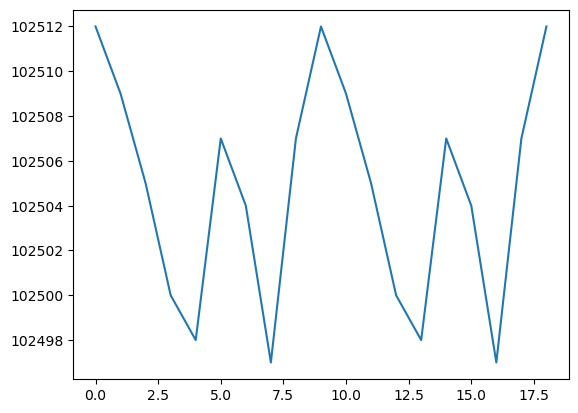

In [59]:
#plot df_punkty (vector)
import matplotlib.pyplot as plt

plt.plot(df_punkty[198:217])
plt.show()

In [47]:
df_punkty[100]
df_punkty[108]

df_punkty[201]

102500

In [68]:
x = (298 - 198) % 9
x

1

In [69]:
(1000000000 - 198) % 9

1

In [70]:
df_punkty[298]

102509

In [ ]:
102509

x - punkt ktorego chcemy znac wartosc
(x - (punkt rozpoczenia cyklu)) % dł_cyklu


[102512,
 102509,
 102505,
 102500,
 102498,
 102507,
 102504,
 102497,
 102507,
 102512,
 102509,
 102505,
 102500,
 102498,
 102507,
 102504,
 102497,
 102507,
 102512]

100 - ..12

107 - 
108 - ..12
100:107
102512, 102505, 102500, 102498, 102507, 102504, 102497, 102507

In [39]:
np.rot90(df, 1, (1,0))

array([['#', '#', '.', '.', '.', 'O', 'O', 'O', 'O', 'O'],
       ['O', 'O', '.', '.', '.', '.', '.', 'O', 'O', 'O'],
       ['O', '.', '.', '.', '#', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '#', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', 'O', '.', '#', '.'],
       ['#', '#', '.', '#', '.', '.', 'O', '#', '.', '#'],
       ['O', '#', '.', '.', '.', '.', '.', '#', '.', 'O'],
       ['O', '#', '.', '.', '#', '.', '.', '.', '.', '.'],
       ['.', 'O', '.', '.', '.', '#', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '#', 'O', '.', '.', '#', '.']], dtype='<U1')

In [157]:
df

array([['O', 'O', 'O', 'O', '.', '#', '.', 'O', '.', '.'],
       ['O', 'O', '.', '.', '#', '.', '.', '.', '.', '#'],
       ['O', 'O', '.', '.', 'O', '#', '#', '.', '.', 'O'],
       ['O', '.', '.', '#', '.', 'O', 'O', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '#', '.'],
       ['.', '.', '#', '.', '.', '.', '.', '#', '.', '#'],
       ['.', '.', 'O', '.', '.', '#', '.', 'O', '.', 'O'],
       ['.', '.', 'O', '.', '.', '.', '.', '.', '.', '.'],
       ['#', '.', '.', '.', '.', '#', '#', '#', '.', '.'],
       ['#', '.', '.', '.', '.', '#', '.', '.', '.', '.']], dtype='<U1')